# Acoustic Anomaly Detection with Azure Machine Learning

## 2. Audio Statistics

<img src="https://github.com/retkowsky/Audio_Analytics_With_AzureML/raw/main/image.jpg" width = 800>
<div class="alert alert-info"> <b> In this notebook we will generate some audio statistics</b></div>

Serge Retkowsky | serge.retkowsky@microsoft.com | 31-May-2022 | V1

In [1]:
# pip install audio_metadata

In [2]:
# pip install seaborn

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import wave
from scipy.io import wavfile as wav
import os
import os.path, time
import seaborn
import glob
from datetime import datetime
import shutil
from pathlib import Path
import urllib.request
from zipfile import ZipFile
import pandas as pd
import audio_metadata

In [4]:
import sys
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [5]:
import datetime
print('Current Date: ' + str(datetime.datetime.today()))

Current Date: 2022-05-31 08:57:49.953165


## Python function to display audio statistics from a wav file

In [6]:
def AudioMetadata(audiofile):
    
    import os.path
    import time
    import audio_metadata
    
    lastmodifdate = time.ctime(os.path.getmtime(audiofile))
    creationdate = time.ctime(os.path.getctime(audiofile))
    audiofilemetadata = audio_metadata.load(audiofile)
    audioformat = audiofilemetadata['streaminfo']['audio_format']
    bitdepth = audiofilemetadata['streaminfo']['bit_depth']
    bitrate = audiofilemetadata['streaminfo']['bitrate']
    nbchannels = audiofilemetadata['streaminfo']['channels']
    duration = audiofilemetadata['streaminfo']['duration']
    samplerate = audiofilemetadata['streaminfo']['sample_rate']
    audiofilesize = audiofilemetadata['filesize']
    
    print("--- Audio Statistics ---\n")
    print("Audio File:\t", audiofile)
    print("Modified Date:\t", lastmodifdate)
    print("Creation Date:\t", creationdate)
    print("File Size:\t", audiofilesize)
    print("Audio Format:\t", audioformat)
    print("Bit Depth:\t", bitdepth)
    print("Bit Rate:\t", bitrate)
    print("Sampling Rate:\t", samplerate)
    print("Nb of Channels:\t", nbchannels)
    print("Duration:\t", duration)
    print()
    return { 'audiofile' : audiofile , 'lastmodifdate' : lastmodifdate,  'creationdate' : creationdate ,
             'audiofilesize' : audiofilesize , 'audioformat' : audioformat,  'bitdepth' : bitdepth ,
             'bitrate' : bitrate , 'samplerate' : samplerate,  'nbchannels' : nbchannels , 'duration' : duration }

In [7]:
def dirfiles(mypath):
    
    print("Total of files in", mypath, "=", sum(len(files) for _, _, files in os.walk(mypath)), '\n')
    
    for root, _, files in os.walk(mypath):
        print(root, ":", len(files), "files")

In [8]:
dirfiles("soundssamples/")

Total of files in soundssamples/ = 122 

soundssamples/ : 0 files
soundssamples/KO : 61 files
soundssamples/OK : 61 files


In [9]:
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", 
                                  "ModifiedDate", "CreationDate", "FileSize", 
                                   "AudioFormat", "BitDepth" , "BitRate", "SamplingRate", 
                                   "NbChannels", "Duration"])

In [10]:
def dfaudiocreation(wavdir):
    
    nbfiles = 1
    
    for roots, directories, files in os.walk(wavdir, topdown=False):
    
        for file in files:
            if file.endswith('.wav'):
     
                wavfilelocation = roots + '/' + file
                catwav = os.path.basename(os.path.normpath(roots))
                subd = Path(roots)
                subdir=subd.parts[1]
                result=AudioMetadata(wavfilelocation)

                dfaudio.at[nbfiles, 'AudioFilePath'] = wavfilelocation
                dfaudio.at[nbfiles, 'SubDir'] = subdir
                dfaudio.at[nbfiles, 'AudioFile'] = file
                dfaudio.at[nbfiles, 'CategoryWav'] = catwav
                dfaudio.at[nbfiles, 'ModifiedDate'] = result['lastmodifdate']
                dfaudio.at[nbfiles, 'CreationDate'] = result['creationdate']
                dfaudio.at[nbfiles, 'FileSize'] = result['audiofilesize']
                dfaudio.at[nbfiles, 'AudioFormat'] = result['audioformat']
                dfaudio.at[nbfiles, 'BitDepth'] = result['bitdepth']
                dfaudio.at[nbfiles, 'BitRate'] = result['bitrate']
                dfaudio.at[nbfiles, 'SamplingRate'] = result['samplerate']
                dfaudio.at[nbfiles, 'NbChannels'] = result['nbchannels']
                dfaudio.at[nbfiles, 'Duration'] = result['duration']
                nbfiles+=1

    dfaudio['FileSize'] = dfaudio['FileSize'].astype(int, errors = 'raise')
    dfaudio['BitDepth'] = dfaudio['BitDepth'].astype(int, errors = 'raise')
    dfaudio['BitRate'] = dfaudio['BitRate'].astype(float, errors = 'raise')
    dfaudio['SamplingRate'] = dfaudio['SamplingRate'].astype(float, errors = 'raise')
    dfaudio['NbChannels'] = dfaudio['NbChannels'].astype(int, errors = 'raise')
    dfaudio['Duration'] = dfaudio['Duration'].astype(float, errors = 'raise')
    
    print("\n ===== Number of files analyzed =", nbfiles - 1, '=====')

In [11]:
dfaudiocreation('soundssamples/KO')

--- Audio Statistics ---

Audio File:	 soundssamples/KO/machine_KO_1.wav
Modified Date:	 Tue May 31 08:56:46 2022
Creation Date:	 Tue May 31 08:56:46 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/KO/machine_KO_10.wav
Modified Date:	 Tue May 31 08:56:47 2022
Creation Date:	 Tue May 31 08:56:47 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/KO/machine_KO_11.wav
Modified Date:	 Tue May 31 08:56:47 2022
Creation Date:	 Tue May 31 08:56:47 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/KO/machine_KO_12.wav
Modified Date:	 Tue M

--- Audio Statistics ---

Audio File:	 soundssamples/KO/machine_KO_35.wav
Modified Date:	 Tue May 31 08:56:50 2022
Creation Date:	 Tue May 31 08:56:50 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/KO/machine_KO_36.wav
Modified Date:	 Tue May 31 08:56:50 2022
Creation Date:	 Tue May 31 08:56:50 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/KO/machine_KO_37.wav
Modified Date:	 Tue May 31 08:56:50 2022
Creation Date:	 Tue May 31 08:56:50 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/KO/machine_KO_38.wav
Modified Date:	 Tue 

--- Audio Statistics ---

Audio File:	 soundssamples/KO/machine_KO_61.wav
Modified Date:	 Tue May 31 08:56:53 2022
Creation Date:	 Tue May 31 08:56:53 2022
File Size:	 665776
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 3.7739909297052154

--- Audio Statistics ---

Audio File:	 soundssamples/KO/machine_KO_7.wav
Modified Date:	 Tue May 31 08:56:47 2022
Creation Date:	 Tue May 31 08:56:47 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/KO/machine_KO_8.wav
Modified Date:	 Tue May 31 08:56:47 2022
Creation Date:	 Tue May 31 08:56:47 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/KO/machine_KO_9.wav
Modified 

In [12]:
dfaudioKO = dfaudio

In [13]:
dfaudioKO.shape

(61, 13)

In [14]:
dfaudioKO.head()

,AudioFilePath,SubDir,AudioFile,CategoryWav,ModifiedDate,CreationDate,FileSize,AudioFormat,BitDepth,BitRate,SamplingRate,NbChannels,Duration
1,soundssamples/KO/machine_KO_1.wav,KO,machine_KO_1.wav,KO,Tue May 31 08:56:46 2022,Tue May 31 08:56:46 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
2,soundssamples/KO/machine_KO_10.wav,KO,machine_KO_10.wav,KO,Tue May 31 08:56:47 2022,Tue May 31 08:56:47 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
3,soundssamples/KO/machine_KO_11.wav,KO,machine_KO_11.wav,KO,Tue May 31 08:56:47 2022,Tue May 31 08:56:47 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
4,soundssamples/KO/machine_KO_12.wav,KO,machine_KO_12.wav,KO,Tue May 31 08:56:47 2022,Tue May 31 08:56:47 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
5,soundssamples/KO/machine_KO_13.wav,KO,machine_KO_13.wav,KO,Tue May 31 08:56:47 2022,Tue May 31 08:56:47 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0


<AxesSubplot:>

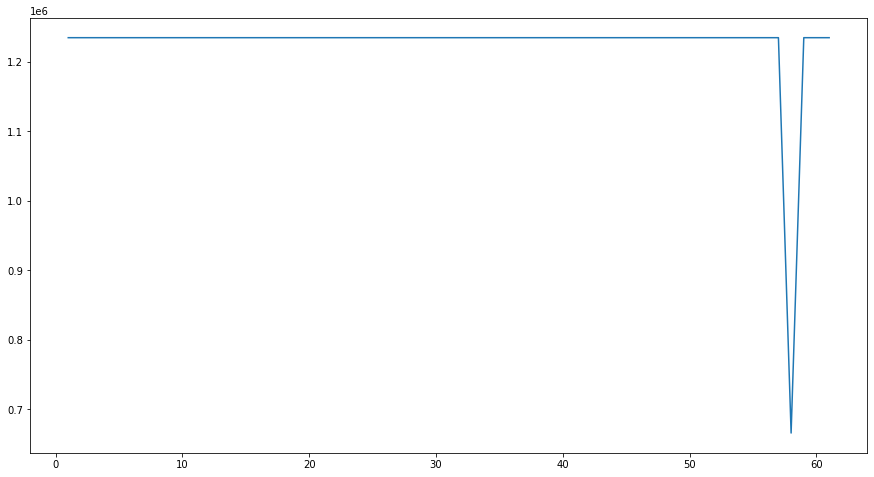

In [15]:
dfaudioKO["FileSize"].plot(figsize=(15, 8))

<AxesSubplot:>

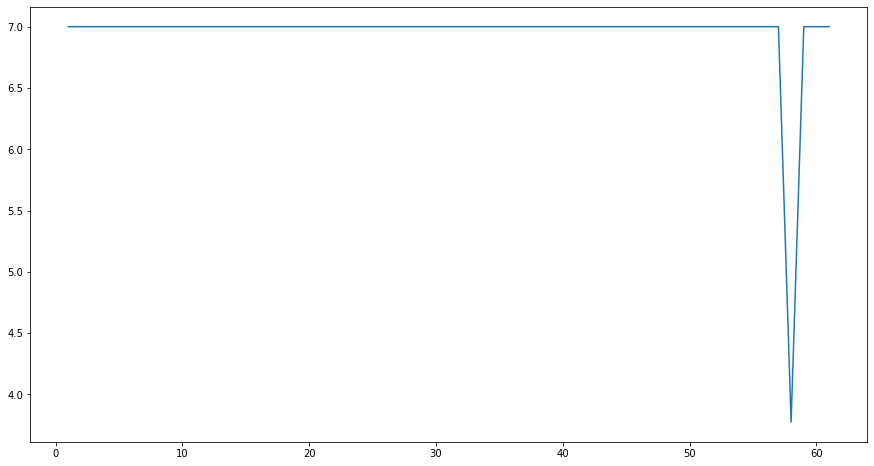

In [16]:
dfaudioKO["Duration"].plot(figsize=(15, 8))

In [17]:
del dfaudio

In [18]:
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", "ModifiedDate", 
                                   "CreationDate", "FileSize", "AudioFormat", "BitDepth" , "BitRate", 
                                  "SamplingRate", "NbChannels", "Duration" ] )

In [19]:
dfaudiocreation('soundssamples/OK')

--- Audio Statistics ---

Audio File:	 soundssamples/OK/machine_OK_1.wav
Modified Date:	 Tue May 31 08:56:28 2022
Creation Date:	 Tue May 31 08:56:28 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/OK/machine_OK_10.wav
Modified Date:	 Tue May 31 08:56:29 2022
Creation Date:	 Tue May 31 08:56:29 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/OK/machine_OK_11.wav
Modified Date:	 Tue May 31 08:56:29 2022
Creation Date:	 Tue May 31 08:56:29 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/OK/machine_OK_12.wav
Modified Date:	 Tue M

--- Audio Statistics ---

Audio File:	 soundssamples/OK/machine_OK_35.wav
Modified Date:	 Tue May 31 08:56:32 2022
Creation Date:	 Tue May 31 08:56:32 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/OK/machine_OK_36.wav
Modified Date:	 Tue May 31 08:56:32 2022
Creation Date:	 Tue May 31 08:56:32 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/OK/machine_OK_37.wav
Modified Date:	 Tue May 31 08:56:32 2022
Creation Date:	 Tue May 31 08:56:32 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/OK/machine_OK_38.wav
Modified Date:	 Tue 

Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/OK/machine_OK_61.wav
Modified Date:	 Tue May 31 08:56:35 2022
Creation Date:	 Tue May 31 08:56:35 2022
File Size:	 665776
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 3.7739909297052154

--- Audio Statistics ---

Audio File:	 soundssamples/OK/machine_OK_7.wav
Modified Date:	 Tue May 31 08:56:29 2022
Creation Date:	 Tue May 31 08:56:29 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

--- Audio Statistics ---

Audio File:	 soundssamples/OK/machine_OK_8.wav
Modified Date:	 Tue May 31 08:56:29 2022
Creation Date:	 Tue May 31 08:56:29 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duratio

In [20]:
dfaudioOK = dfaudio

In [21]:
dfaudioOK.shape

(61, 13)

## All files analysis

In [22]:
print(dfaudioKO.shape)
print(dfaudioOK.shape)

(61, 13)
(61, 13)


In [23]:
dfaudioall = pd.concat([dfaudioKO, dfaudioOK])

In [24]:
dfaudioall.shape

(122, 13)

In [25]:
dfaudioall.head()

,AudioFilePath,SubDir,AudioFile,CategoryWav,ModifiedDate,CreationDate,FileSize,AudioFormat,BitDepth,BitRate,SamplingRate,NbChannels,Duration
1,soundssamples/KO/machine_KO_1.wav,KO,machine_KO_1.wav,KO,Tue May 31 08:56:46 2022,Tue May 31 08:56:46 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
2,soundssamples/KO/machine_KO_10.wav,KO,machine_KO_10.wav,KO,Tue May 31 08:56:47 2022,Tue May 31 08:56:47 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
3,soundssamples/KO/machine_KO_11.wav,KO,machine_KO_11.wav,KO,Tue May 31 08:56:47 2022,Tue May 31 08:56:47 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
4,soundssamples/KO/machine_KO_12.wav,KO,machine_KO_12.wav,KO,Tue May 31 08:56:47 2022,Tue May 31 08:56:47 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
5,soundssamples/KO/machine_KO_13.wav,KO,machine_KO_13.wav,KO,Tue May 31 08:56:47 2022,Tue May 31 08:56:47 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0


(61, 13)


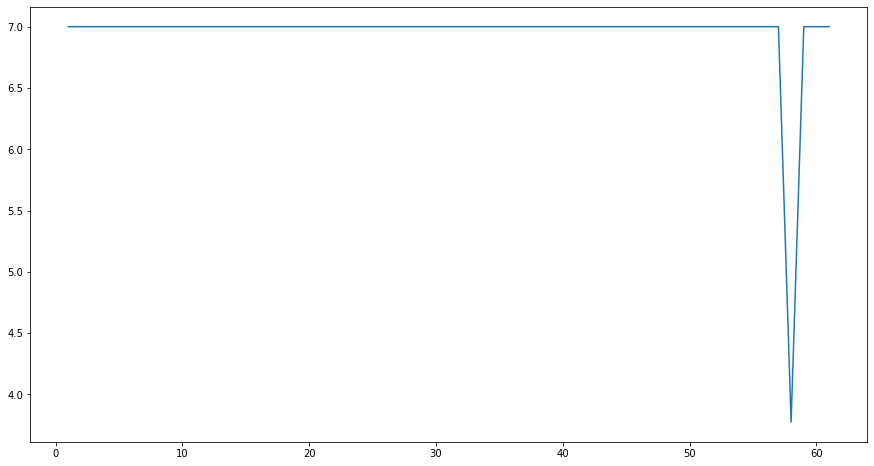

In [26]:
df=dfaudioall[(dfaudioall.SubDir == "KO")]
print(df.shape)
df["Duration"].plot(figsize = (15, 8))
del df

(61, 13)


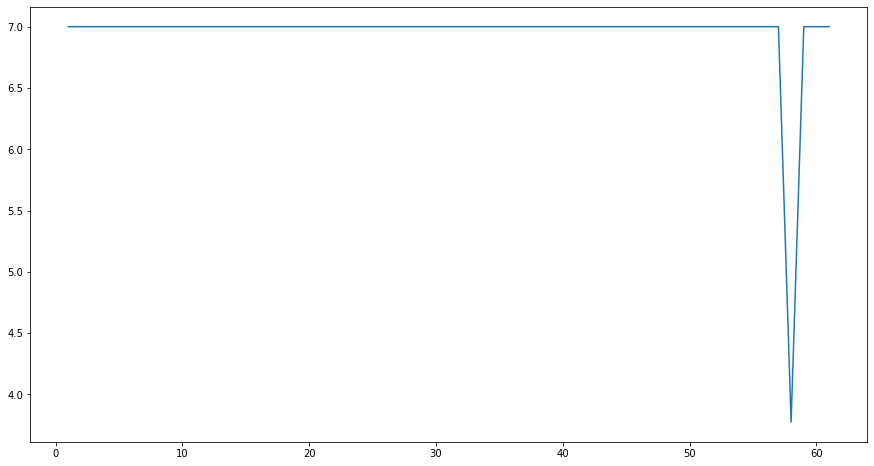

In [27]:
df=dfaudioall[(dfaudioall.SubDir == "OK") & (dfaudioall.Duration > 1)]
print(df.shape)
df["Duration"].plot(figsize = (15, 8))
del df

## We can export all the results into a CSV file

In [28]:
dfaudioall.to_csv('AudioStatistics.csv')

In [29]:
ls AudioStatistics.csv -lh

-rwxrwxrwx 1 root root 21K May 31 08:58 AudioStatistics.csv*


In [30]:
from IPython.display import FileLink

AUDIOSTATS_LINK = FileLink(path='AudioStatistics.csv')
print("Click to download the file:")
AUDIOSTATS_LINK

Click to download the file:


/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow8/code/Users/seretkow/MachineNoiseDetection/AudioStatistics.csv

> End. You can go to the next notebook

Note: All these Python notebooks were made for demo purposes. They were not designed for production usage. Some feature can be currently in public preview. This preview version is provided without a service-level agreement. Certain features might not be supported or might have constrained capabilities. For more information, see Supplemental Terms of Use for Microsoft Azure Previews. https://azure.microsoft.com/en-us/support/legal/preview-supplemental-terms/